<a href="https://colab.research.google.com/github/j-hartmann/data_science_intros/blob/main/MNIST_and_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST & Fashion MNIST Classification Notebook
This notebook is losely based on the example provided at https://victorzhou.com/blog/keras-neural-network-tutorial/: 

MNIST is publicly available image data set which consists of 28 by 28 pixels image of hand-written single digits. So each image in MNIST is an image of a digit from 0 to 9. MNIST challenge is to develop a machine learning algorithm that can classify these images into 10 classes (0 to 9).

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

## Setup

In [1]:
!pip install mnist

In [2]:
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

8051    4
9813    4
3288    4
6488    4
dtype: uint8


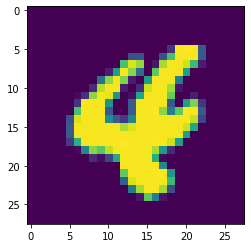

In [4]:
test_images.shape
import pandas as pd
print(pd.Series(test_labels).loc[test_labels == 4].sample(4))
from matplotlib import pyplot as plt
plt.imshow(test_images[95])


In [5]:
# load alternative fashion mnist dataset
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Understand the Data

In [6]:
# how many examples do we have?
print(len(train_images))
print(len(train_labels))

60000
60000


In [7]:
train_labels.shape

(60000,)

In [8]:
# what resolution do our images have?
train_images.shape

(60000, 28, 28)

In [9]:
np.random.randn(4,4).reshape((-1,8)).flatten().mean()

-0.3194094749876739

Label: 7


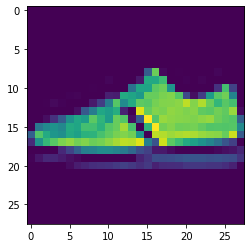

In [10]:
# let's look at some examples
from matplotlib import pyplot as plt
num = 132
print('Label:',train_labels[num])
plt.imshow(train_images[num])
plt.show()

In [11]:
# how many do we have of each example?
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [12]:
# how is our image data represented?
np.unique(train_images)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Data Preparation

In [13]:
# normalize the images
train_images = (train_images-train_images.mean())/train_images.std()
test_images = (test_images-train_images.mean())/train_images.std()

In [14]:
# flatten the images
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

In [15]:
# do we need to transform labels (later)?
print(to_categorical(train_labels)[:2])
(train_labels[:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([9, 0], dtype=uint8)

## Get the Model

In [16]:
# build the model
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# compile the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy', 
  metrics=['accuracy'],
)

# let's take a look at our model
model.summary()

# why do we get the specific number of parameters?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [17]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=64,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.4767 - accuracy: 0.8278 - val_loss: 30.8427 - val_accuracy: 0.7410
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3584 - accuracy: 0.8697 - val_loss: 20.4884 - val_accuracy: 0.8087
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.3250 - accuracy: 0.8808 - val_loss: 21.2787 - val_accuracy: 0.8137
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3012 - accuracy: 0.8889 - val_loss: 19.9639 - val_accuracy: 0.8018
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2861 - accuracy: 0.8932 - val_loss: 27.8697 - val_accuracy: 0.7786


## Evaluate Model

In [18]:
model.evaluate( 
  test_images, 
  to_categorical(test_labels)
)

# # predict on the first 5 test images.
# predictions = model.predict(test_images[:5])

# # print our model's predictions
# print(np.argmax(predictions, axis=1)) 

# # check our predictions against the ground truths
# print(test_labels[:5]) 

313/313 [==============================] - 1s 2ms/step - loss: 27.8697 - accuracy: 0.7786


[27.869712829589844, 0.7785999774932861]

In [ ]:
# wouldn't it be nice to track test loss while training?

## Save (and Load) Model

In [19]:
model.save('mnist_pretrained_model')

INFO:tensorflow:Assets written to: mnist_pretrained_model/assets


In [20]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("mnist_pretrained_model")

In [21]:
reconstructed_model.evaluate( 
  test_images, 
  to_categorical(test_labels)
)

# predict on the first 5 test images.
predictions = reconstructed_model.predict(test_images[:5])

# print our model's predictions
print(np.argmax(predictions, axis=1)) 

# check our predictions against the ground truths
print(test_labels[:5]) 

313/313 [==============================] - 1s 2ms/step - loss: 27.8697 - accuracy: 0.7786
[9 2 1 1 6]
[9 2 1 1 6]


In [22]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Try Alternative Model incl. CNNs

##### Get Model inlc. CNN

In [23]:
model = Sequential([
  Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# compile the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy', 
  metrics=['accuracy'],
)

# let's take a look at our model


##### Train CNN Model

In [24]:
model.fit(
  train_images.reshape(train_images.shape[0],28,28,1),
  to_categorical(train_labels),
  epochs=5,
  batch_size=64,
  validation_data=(test_images.reshape(test_images.shape[0],28,28,1), to_categorical(test_labels)),
)

Epoch 1/5
938/938 [==============================] - 46s 48ms/step - loss: 0.4015 - accuracy: 0.8559 - val_loss: 16.1253 - val_accuracy: 0.8432
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.2736 - accuracy: 0.9009 - val_loss: 17.2618 - val_accuracy: 0.8560
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.2308 - accuracy: 0.9154 - val_loss: 28.5285 - val_accuracy: 0.8039
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.2028 - accuracy: 0.9258 - val_loss: 21.7230 - val_accuracy: 0.8331
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.1770 - accuracy: 0.9334 - val_loss: 23.1504 - val_accuracy: 0.8476


##### Evaluate CNN Model

In [27]:
model.evaluate( 
  test_images.reshape(test_images.shape[0],28,28,1), 
  to_categorical(test_labels)
)

# predict on the first 5 test images.
predictions = model.predict(test_images.reshape(test_images.shape[0],28,28,1)[:5])

# print our model's predictions
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

313/313 [==============================] - 2s 8ms/step - loss: 23.1504 - accuracy: 0.8476
[9 2 1 1 6]
[9 2 1 1 6]
